## Init

In [102]:
import pandas as pd
import numpy as np

import seaborn as sns #Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지, 약간 요소들간의 연관성을 비교하고자 할때 편리한듯?
import matplotlib.pyplot as plt
%matplotlib inline  
# %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import Input, Model
from tensorflow.keras import Sequential
from tensorflow.keras.applications import resnet_v2
from keras.backend import int_shape
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import *
import tensorflow_addons as tfa

from sklearn.utils import shuffle
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

In [103]:
import warnings
warnings.filterwarnings("ignore")

In [104]:
train = pd.read_csv('./train.csv')
label = train['leaf_weight']
train.drop(['img_name'], axis=1, inplace=True)

test = pd.read_csv('./test.csv')
test.drop(['img_name'], axis=1, inplace=True)

In [105]:
train.head()

,day_in_temp,night_in_temp,day_in_humi,night_in_humi,day_co2,night_co2,day_ec,night_ec,day_water,night_water,day_white,night_white,day_red,night_red,day_blue,night_blue,img_pixel,leaf_weight
0,18.625882,26.629242,78.413088,76.605303,559.897059,398.310606,18.243235,21.542879,0.0,0.0,193.019118,193.386364,193.905882,193.690909,0.295588,0.0,7777.0,49.193
1,18.971176,27.916212,80.035735,74.764091,563.860294,378.133333,17.914559,24.389242,0.0,0.0,195.088235,194.910606,195.383824,194.606061,0.295588,0.0,8004.0,59.764
2,19.191912,27.503182,80.032647,74.511970,569.777941,385.709091,18.504265,23.430454,0.0,0.0,194.792647,194.300000,194.794118,192.778788,0.295588,0.0,8336.0,72.209
3,18.338971,24.238939,80.903382,78.914545,560.339706,387.825758,17.964706,18.493939,0.0,0.0,192.133824,193.693939,192.723529,194.606061,0.295588,0.0,8581.0,85.737
4,19.151765,25.195454,82.164706,80.358939,565.273529,393.254545,18.756324,20.188939,0.0,0.0,193.314706,193.692424,193.610294,194.300000,0.295588,0.0,8969.0,102.537


Index(['day_in_temp', 'night_in_temp', 'day_in_humi', 'night_in_humi',
       'day_co2', 'night_co2', 'day_ec', 'night_ec', 'day_water',
       'night_water', 'day_white', 'night_white', 'day_red', 'night_red',
       'day_blue', 'night_blue', 'img_pixel', 'leaf_weight'],
      dtype='object')


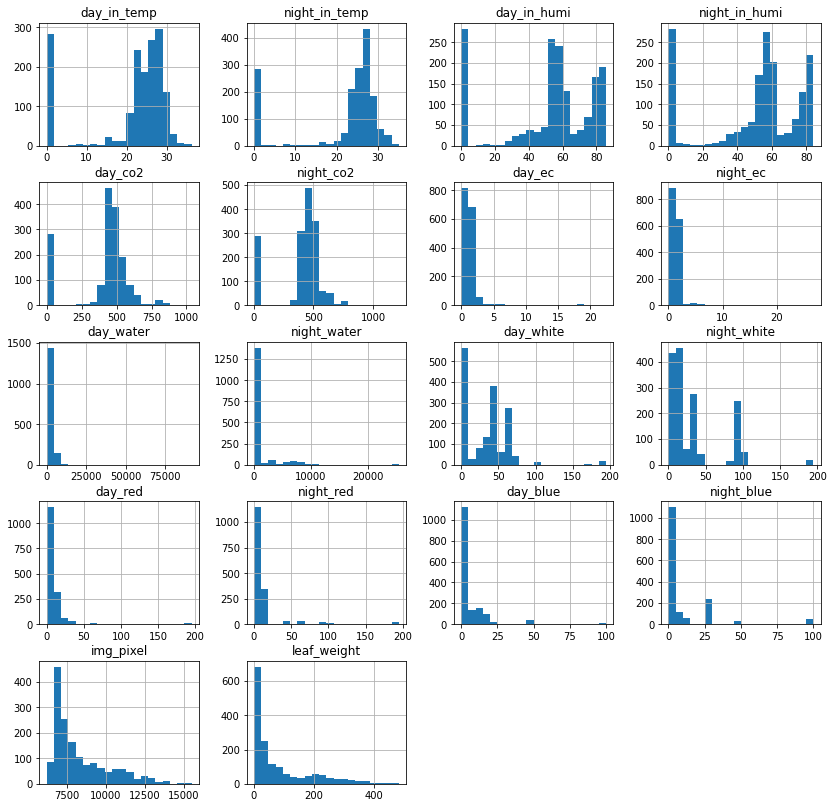

In [106]:
plot_cols_list = train.columns[0:]
print(plot_cols_list)

train[plot_cols_list].hist(figsize=(14,14), grid = True, layout = (5,4), bins = 20)
plt.show()

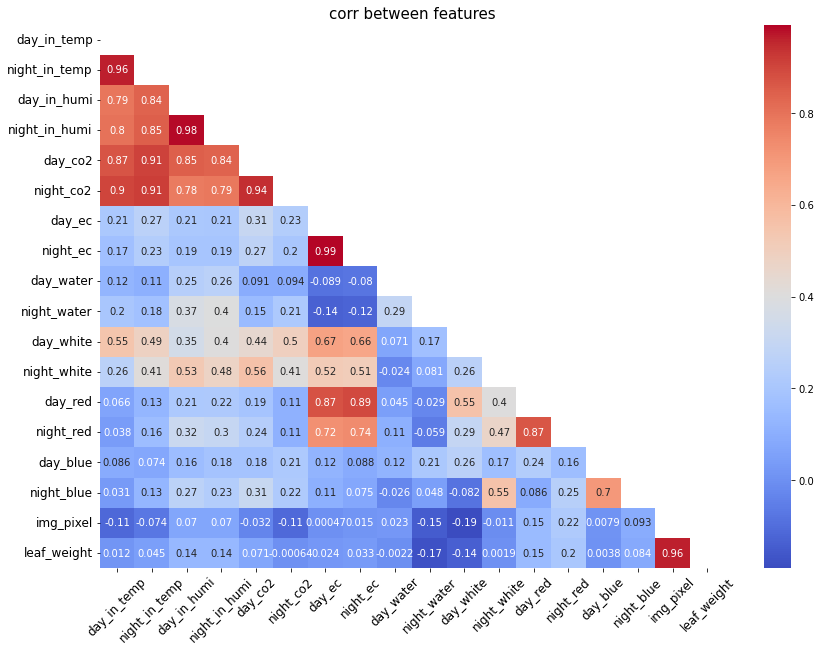

In [107]:
def corr_heat(df):
    plt.figure(figsize=(14,10))

    corr_df = df.corr()
    #display(corr_df)

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr between features', fontsize=15)
    plt.show()
    
corr_heat(train[plot_cols_list])

## 이상치 제거

In [108]:
idx = train[train["night_in_temp"]==0].index

In [109]:
print(idx)

Int64Index([  18,   19,   95,   96,   97,   98,   99,  100,  101,  102,
            ...
            1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562],
           dtype='int64', length=283)


In [110]:
train = train.drop(index = idx, axis = 0)
label = label.drop(index = idx, axis = 0)

## 파생변수 생성

In [111]:
#train = train[train.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,16,17]]]

In [112]:
columns = plot_cols_list[:-2]

In [113]:
for col in columns : 
    train[col] = train[col]*train['img_pixel']
    test[col] = test[col]*test['img_pixel']

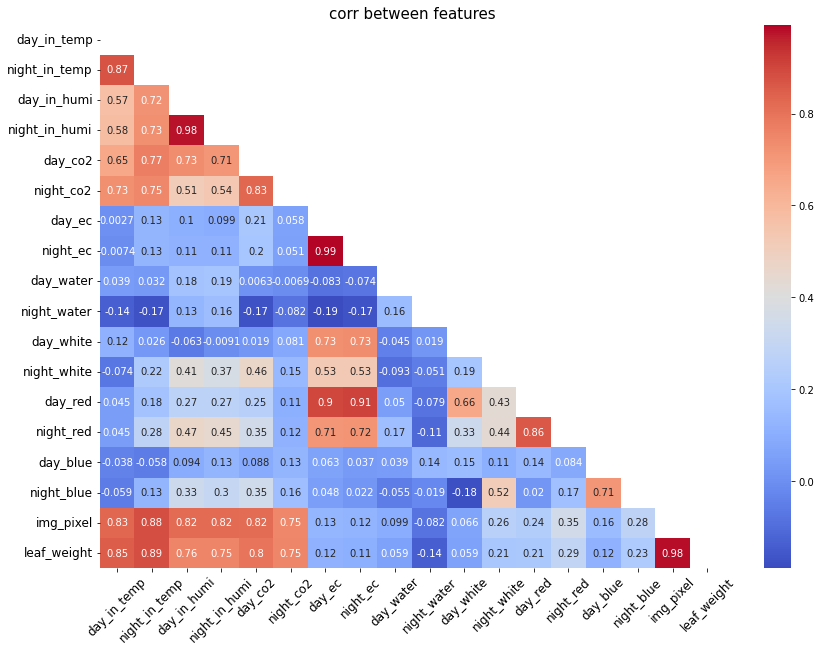

In [114]:
def corr_heat(df):
    plt.figure(figsize=(14,10))

    corr_df = df.corr()
    #display(corr_df)

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr between features', fontsize=15)
    plt.show()

plot_cols_list = train.columns[0:]
corr_heat(train[plot_cols_list])

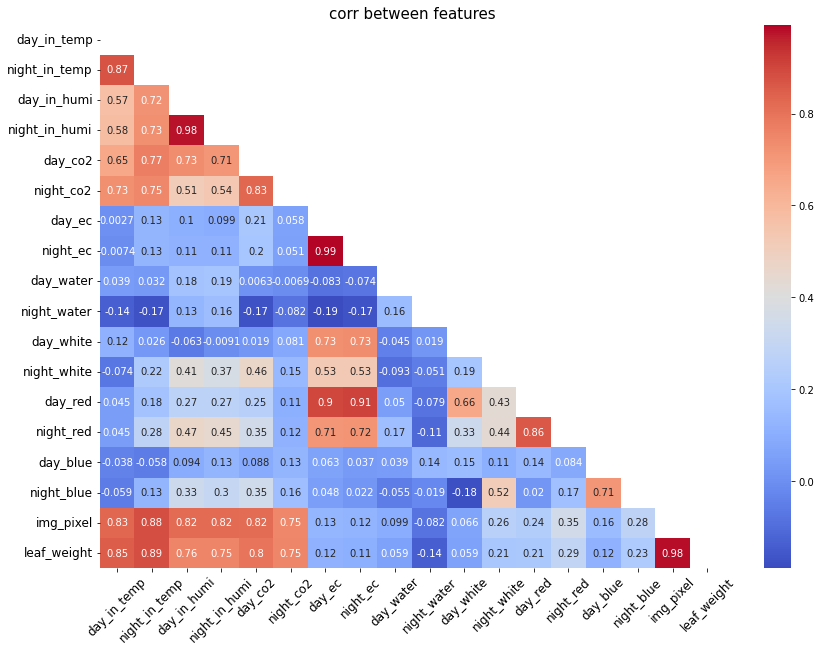

In [115]:
def corr_heat(df):
    plt.figure(figsize=(14,10))

    corr_df = df.corr()
    #display(corr_df)

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr between features', fontsize=15)
    plt.show()

plot_cols_list = train.columns[0:]
corr_heat(train[plot_cols_list])

In [116]:
train.drop(train.columns[6:-1], axis=1, inplace=True)
test.drop(test.columns[6:], axis=1, inplace=True)

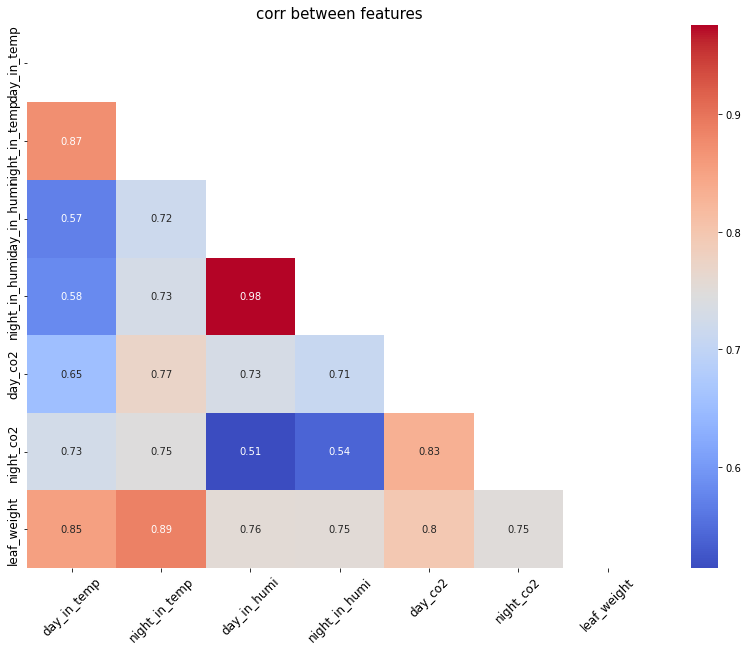

In [117]:
def corr_heat(df):
    plt.figure(figsize=(14,10))

    corr_df = df.corr()
    #display(corr_df)

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr between features', fontsize=15)
    plt.show()

plot_cols_list = train.columns[0:]
corr_heat(train[plot_cols_list])

In [118]:
train['new1'] = train['day_in_temp'] + train['night_in_temp']
train['new2'] = train['day_in_humi'] +  train['night_in_humi']
train['new3'] = train['day_co2'] +  train['night_co2']

test['new1'] = test['day_in_temp'] + test['night_in_temp']
test['new2'] = test['day_in_humi'] +  test['night_in_humi']
test['new3'] = test['day_co2'] +  test['night_co2']

train = train[train.columns[[0,1,2,3,4,5,7,8,9,6]]]

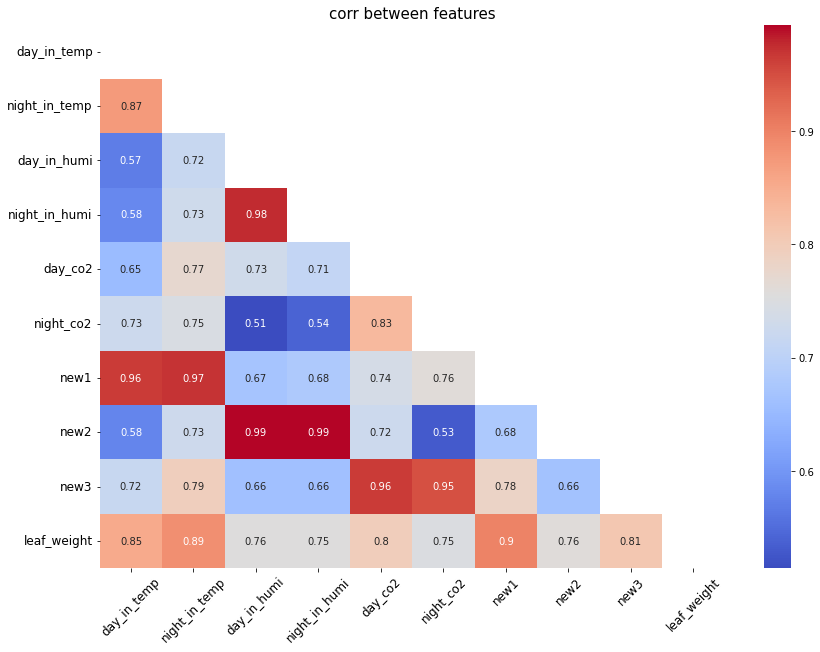

In [119]:
def corr_heat(df):
    plt.figure(figsize=(14,10))

    corr_df = df.corr()
    #display(corr_df)

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr between features', fontsize=15)
    plt.show()

plot_cols_list = train.columns[0:]
corr_heat(train[plot_cols_list])

In [125]:
def abcd1(df,col1,col2,set_col,df_update = False, test = False):
    result1 = []
    df[set_col] = 2*df[col1]+df[col2]
    result = df.set_index(set_col).reset_index().corr()[set_col]['leaf_weight']
    result1.append(result)
    df[set_col] = 2*df[col1]-df[col2]
    result = df.set_index(set_col).reset_index().corr()[set_col]['leaf_weight']
    result1.append(result)
    df[set_col] = 2*df[col1]/df[col2]
    result = df.set_index(set_col).reset_index().corr()[set_col]['leaf_weight']
    result1.append(result)
    df[set_col] = 2*df[col1]*df[col2]
    result = df.set_index(set_col).reset_index().corr()[set_col]['leaf_weight']
    result1.append(result)
    df[set_col] =3*df[col1]+df[col2]
    result = df.set_index(set_col).reset_index().corr()[set_col]['leaf_weight']
    result1.append(result)
    df[set_col] = 3*df[col1]-df[col2]
    result = df.set_index(set_col).reset_index().corr()[set_col]['leaf_weight']
    result1.append(result)
    df[set_col] = 3*df[col1]/df[col2]
    result = df.set_index(set_col).reset_index().corr()[set_col]['leaf_weight']
    result1.append(result)
    df[set_col] = 3*df[col1]*df[col2]
    result = df.set_index(set_col).reset_index().corr()[set_col]['leaf_weight']
    result1.append(result)
    max_corr = 0
    for n, i in enumerate(result1):
        if max_corr < abs(i):
            max_corr = abs(i)
            num = n
            
    if df_update != False:

        if num == 0:
            df[set_col] = 2*df[col1]+df[col2]
            test[set_col] = 2*test[col1]+test[col2]
        elif num == 1:
            df[set_col] = 2*df[col1]-df[col2]
            test[set_col] = 2*test[col1]-test[col2]
        elif num == 2:
            df[set_col] = 2*df[col1]/df[col2]
            test[set_col] = 2*test[col1]/test[col2]
        elif num == 3:
            df[set_col] = 2*df[col1]*df[col2]
            test[set_col] = 2*test[col1]*test[col2]
        if num == 4:
            df[set_col] = 3*df[col1]+df[col2]
            test[set_col] = 3*test[col1]+test[col2]
        elif num == 5:
            df[set_col] = 3*df[col1]-df[col2]
            test[set_col] = 3*test[col1]-test[col2]
        elif num == 6:
            df[set_col] = 3*df[col1]/df[col2]
            test[set_col] = 3*test[col1]/test[col2]
        elif num == 7:
            df[set_col] = 3*df[col1]*df[col2]
            test[set_col] = 3*test[col1]*test[col2]

        return df, test
    else:
        return max_corr

In [126]:

max_result = 0
max_result_total = 0
i = 1
X_features = train
for col1 in X_features.columns:
    for col2 in X_features.columns: 
        if (col1=='leaf_weight')|(col2=='leaf_weight')|(col1=='new4')|(col2=='new4'):
            continue
        else:
            result = abcd1(train, col1, col2,'new4')
#             print(result,col1,col2)
            if max_result < abs(result):
                max_result = result
                print(max_result)
                columns = [col1, col2]
df,test = abcd1(train,columns[0],columns[1],'new4',df_update=True,test = test)

0.8827378002364132
0.9251849374891283
0.9315711287076881


In [128]:
train = train[train.columns[[0,1,2,3,4,5,6,7,8,10,9]]]

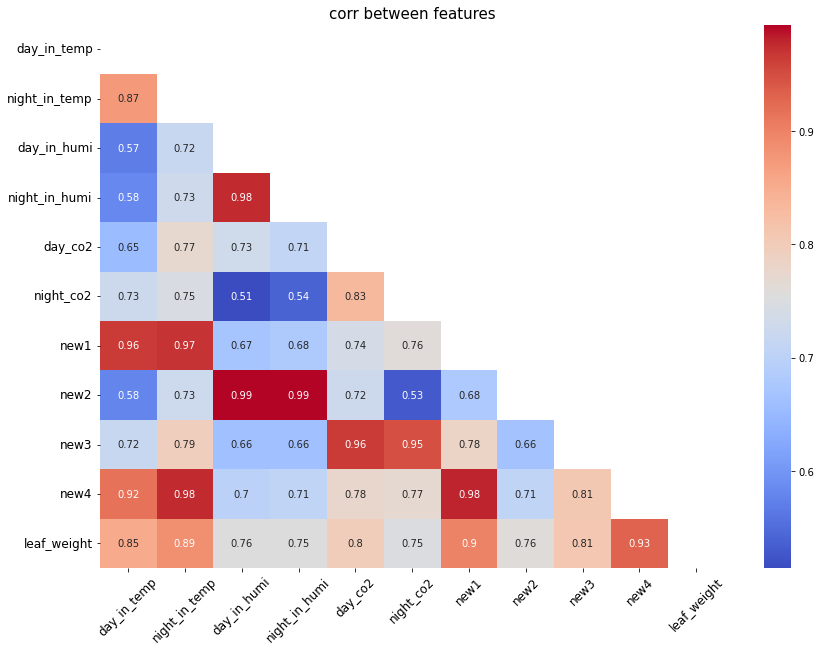

In [129]:
def corr_heat(df):
    plt.figure(figsize=(14,10))

    corr_df = df.corr()
    #display(corr_df)

    mask = np.zeros_like(corr_df)
    mask[np.triu_indices_from(mask)] = 1
    heat_map = sns.heatmap(corr_df, annot=True, mask = mask, cmap='coolwarm')
    heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
    heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
    plt.title('corr between features', fontsize=15)
    plt.show()

plot_cols_list = train.columns[0:]
corr_heat(train[plot_cols_list])

## 전처리

In [130]:
train.drop(['leaf_weight'], axis=1, inplace=True)
print(train.columns.values)

['day_in_temp' 'night_in_temp' 'day_in_humi' 'night_in_humi' 'day_co2'
 'night_co2' 'new1' 'new2' 'new3' 'new4']


In [131]:
train, label = shuffle(train, label, random_state = 3)

In [132]:
M_label = max(label)

In [133]:
label=label/M_label

In [134]:
label.describe()

count    1309.000000
mean        0.175633
std         0.224695
min         0.000000
25%         0.012449
50%         0.071522
75%         0.276513
max         1.000000
Name: leaf_weight, dtype: float64

In [135]:
scaler = MinMaxScaler()
scaler.fit(train)
train_output = scaler.transform(train)
test_output = scaler.transform(test)

train_output = pd.DataFrame(train_output, columns=train.columns, index=list(train.index.values))
train_output.describe()

,day_in_temp,night_in_temp,day_in_humi,night_in_humi,day_co2,night_co2,new1,new2,new3,new4
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.484518,0.528519,0.438704,0.447610,0.313983,0.432857,0.490055,0.433809,0.404100,0.320447
std,0.145863,0.144852,0.183249,0.177128,0.145887,0.122049,0.147292,0.183149,0.140351,0.163648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.393677,0.435597,0.309869,0.327137,0.212611,0.348399,0.389870,0.306933,0.303696,0.211519
50%,0.456488,0.488339,0.409890,0.415971,0.267302,0.403630,0.454702,0.400824,0.364433,0.264363
75%,0.563840,0.601626,0.537522,0.548941,0.386140,0.497462,0.570776,0.535736,0.479676,0.388832
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
train = train_output
test = test_output

In [137]:
n = round((len(train)*0.85))

x_train = train[:n]
y_train = label[:n]

x_val = train[n:]
y_val = label[n:]

print(f'x_train shape => {x_train.shape}     y_train shape =>{y_train.shape}')
print(f'x_val shape => {x_val.shape}     y_val shape =>{y_val.shape}')
print(f'test shape => {test.shape}')

x_train shape => (1113, 10)     y_train shape =>(1113,)
x_val shape => (196, 10)     y_val shape =>(196,)
test shape => (460, 10)


In [154]:
def bangdoon(input_shape):
    
    input = Input(shape=input_shape)
    model = Dense(units=16, activation='elu')(input)
    model = Dropout(0.25)(model)
    model = Dense(units=32, activation='elu')(input)
    model = Dropout(0.25)(model)
    model = Dense(units=64, activation='elu')(input)
    model = Dropout(0.25)(model)
    output = Dense(units=1, activation='sigmoid')(model) # 0~1 
    model = Model(inputs=input, outputs=output)

    return model

In [155]:
model = bangdoon(x_train.shape[1:])
#opt = Nadam(learning_rate=0.001)

step = tf.Variable(0, trainable=False)
schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
    [100, 150], [1e-0, 1e-1, 1e-2])
# lr and wd can be a function or a tensor
lr = 0.001 * schedule(step)
wd = lambda: 1e-3 * schedule(step)
opt=tfa.optimizers.AdamW(learning_rate=lr, weight_decay=wd)

model.compile(loss='mean_squared_error',  #mse를 쓰면 영향력이 적은 특징들에 제곱을 주어 0에 가깝게 만들어줌
             optimizer=opt,
             #metrics=['mae']
             )  

In [156]:
# 학습 자동 중단 설정
my_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

history = model.fit(
    x=x_train, y=y_train,
    validation_data = (x_val, y_val),
    epochs=1500,
    batch_size=20,
    verbose=0,
    callbacks = my_callback,
)

p_test =[]
p_test_tmp = model.predict(x_val)
rmse_test = np.sqrt(np.mean(np.power(p_test_tmp.reshape(-1, ) - y_val, 2)))
print(f'model RMSE Test = {rmse_test}')

p_test = p_test_tmp

model RMSE Test = 0.07341026275011893


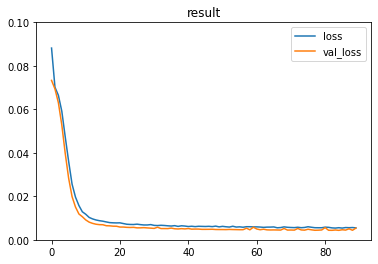

In [157]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot().set_ylim(0.0,0.1)

#pd.DataFrame(history.history)[['loss']].plot().set_ylim(0.0,0.1)
plt.title('result')
plt.show()

In [158]:
y_test = model.predict(test)

y_test = y_test*M_label

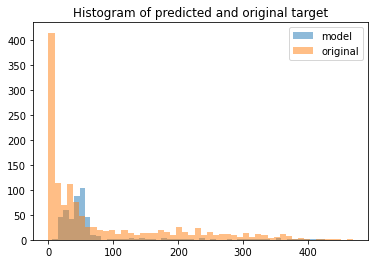

In [159]:
# histogram of scaled target
label_fix = label*M_label
plt.hist(y_test, bins=50, label='model', alpha=0.5)
plt.hist(label_fix, bins=50, label='original', alpha=0.5)

plt.title('Histogram of predicted and original target')
plt.legend()
plt.show()

In [160]:
submission = pd.read_csv('./sample_submission.csv')
submission['leaf_weight'] = y_test
submission.to_csv('./submit/make_col_5.csv', index=False)